Task1_0530. 고객 정보 데이터프레임과 구매 내역 데이터프레임을 결합하여 각 고객이름(name) 별 총 지출을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 고객 정보 데이터프레임 생성
customers = pd.DataFrame({
    'customer_id': [1, 2, 3, 4],
    'name': ['Alice', 'Bob', 'Charlie', 'David']
})

# 구매 내역 데이터프레임 생성
purchases = pd.DataFrame({
    'purchase_id': [101, 102, 103, 104, 105],
    'customer_id': [1, 2, 1, 3, 2],
    'amount': [250, 150, 200, 300, 350]
})

# 결합하여 name 기준으로 총 지출 피벗테이블 구성

df = pd.merge(customers, purchases, on='customer_id', how='inner')

pt = df.pivot_table(columns='name', values='amount', aggfunc='sum')

pt.columns.name = None
print(pt,'\n')

total = df.groupby('name').amount.sum().reset_index()
total

        Alice  Bob  Charlie
amount    450  500      300 



,name,amount
0,Alice,450
1,Bob,500
2,Charlie,300


Task2_0530. 학생 성적 데이터프레임과 과목 데이터프레임을 결합하여 각 과목별 평균 성적을 계산하여 출력하세요.

In [ ]:
import pandas as pd

# 학생 성적 데이터프레임 생성
grades = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 1, 2, 3, 4],
    'subject_id': [101, 101, 102, 102, 103, 103, 101, 103],
    'grade': [85, 90, 78, 88, 92, 95, 80, 85]
})

# 과목 데이터프레임 생성
subjects = pd.DataFrame({
    'subject_id': [101, 102, 103],
    'subject_name': ['Math', 'Science', 'History']
})
#print(grades,'\n')
#print(subjects)

# 두 데이터프레임 subject_id 기준으로 merge 후 피벗테이블은 subject_name 기준으로 구성
df = pd.merge(grades, subjects, on='subject_id', how='inner')

pt = df.pivot_table(columns='subject_name', values='grade', aggfunc='mean', fill_value=0)
pt.columns.name=None
print(pt,'\n')

grouped = df.groupby('subject_name').grade.mean().reset_index()
print(grouped)

         History  Math  Science
grade  90.666667  85.0     83.0 

  subject_name      grade
0      History  90.666667
1         Math  85.000000
2      Science  83.000000


Task3_0530. 고객 데이터프레임에서 age가 30 이상이고 spending이 500 이상인 고객을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
ct = pd.DataFrame({
    'customer_id': [1, 2, 3, 4, 5],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'age': [25, 35, 30, 40, 28],
    'spending': [300, 600, 500, 700, 400]
})

con1 = ct['age'] >= 30
con2 = ct['spending'] >= 500

ct[ con1 & con2 ]

,customer_id,name,age,spending
1,2,Bob,35,600
2,3,Charlie,30,500
3,4,David,40,700


Task4_0530. 학생 성적 데이터프레임에서 math_score가 80 이상 90 이하인 학생을 찾아 출력하세요.

In [ ]:
import pandas as pd

# 예제 데이터프레임 생성
st = pd.DataFrame({
    'student_id': [101, 102, 103, 104, 105],
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'math_score': [75, 85, 88, 92, 78],
    'english_score': [80, 78, 82, 88, 90]
})

c1 = st['math_score'] >= 80
c2 = st['math_score'] <= 90

st[ c1  & c2 ]

,student_id,name,math_score,english_score
1,102,Bob,85,78
2,103,Charlie,88,82


Task5_0530. 주어진 titanic3 데이터셋에서 survived 열을 사용하여 생존자와 비생존자의 수를 계산하여 출력하세요.

In [ ]:
from google.colab import files

# 파일 업로드
uploaded = files.upload()

In [ ]:
import pandas as pd

# 데이터프레임 읽기
file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/titanic3.csv'
df = pd.read_csv(file_path)

survived = df.survived.value_counts()

print(f"생존자 : {survived[1]}명\n비생존자 : {survived[0]}명")

생존자 : 500명
비생존자 : 809명


Task6_0530. 주어진 titanic3 데이터셋에서 pclass 열을 기준으로 각 객실 등급의 평균 운임(fare)을 계산하여 출력하세요.

In [ ]:
df1 = df[['pclass', 'fare']]

df2 = df1.groupby('pclass').fare.apply(lambda x:round(x.mean(), 2)).reset_index()
df2

,pclass,fare
0,1,87.51
1,2,21.18
2,3,13.30


Task7_0530. titanic3 각 변수의 상관계수를 통해 각 변수와 목표 변수(생존 여부) 간의 관계를 파악하세요.

In [ ]:
# 상관계수 : -1 ~ 1사이 -1이나 1사이에 가까울 수록 상관계수가 높은 것 0에 가까울수록 낮은것
import pandas as pd
import numpy as np

file_path = 'drive/MyDrive/KDT_2404/m3_분석 라이브러리/dataset/titanic3.csv'
df = pd.read_csv(file_path)
df.sex.replace({'female':1, 'male':0}, inplace=True)
#df['sex'] = df.sex.map({'male':0, 'female':1})

# 숫자형 데이터만 select하여 저장
df1 = df.select_dtypes(include=[np.number])

# 상관계수 계산
cor_mat = df1.corr()

# 생존여부와의 상관계수 정렬
cor_mat.survived.sort_values(ascending=False)

Task8_0530. 승객의 가족 크기(동반한 형제자매/배우자 수와 부모/자녀 수의 합)가 생존에 영향을 미치는지를 탐색하여 결과를 출력하세요.

<ipython-input-6-296d6190841a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['family'] = df1.sibsp+df1.parch
<ipython-input-6-296d6190841a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['has_family'] = df1.family > 0


family
0     0.302532
1     0.536170
2     0.566038
3     0.697674
4     0.272727
5     0.200000
6     0.250000
7     0.000000
10    0.000000
Name: survived, dtype: float64 

has_family
False    0.302532
True     0.502890
Name: survived, dtype: float64


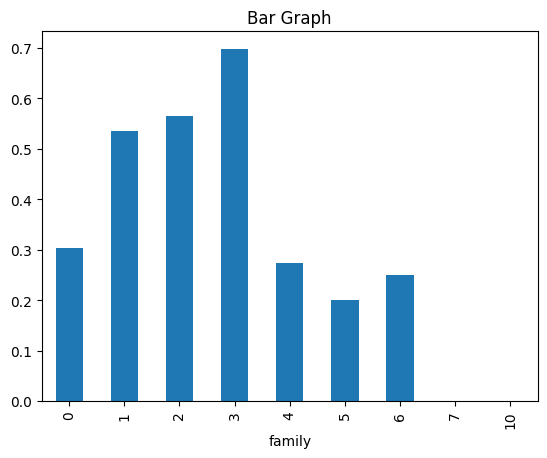

0.02687643412533259

In [ ]:
# sibsp : 형제자매/배우자 수, parch : 부모 자녀 수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = df[['sibsp', 'parch', 'survived']]
df1['family'] = df1.sibsp+df1.parch

# 가족인원수가 높을수록 생존률이 높은가
family_survived = df1.groupby('family').survived.mean()

# 가족이 있는 사람이 생존률이 높은가 없는 사람이 생존률이 높은가
df1['has_family'] = df1.family > 0

has_family_survived = df1.groupby('has_family').survived.mean()
print(family_survived,'\n')
print(has_family_survived)

# 가족이 있는 사람의 생존률이 더 높다.
# 그 중에서도 가족이 3명 있는 사람의 생존률이 가장 높으며
# 그 다음으로는 2명, 그 다음은 1명의 순이다.

family_survived.sort_values(ascending=False)

family_survived.plot.bar()
plt.title('Bar Graph')
plt.show()

# family와 survived의 상관계수를 구하는 방법도 있다
df1[['family','survived']].corr().iloc[0,1]

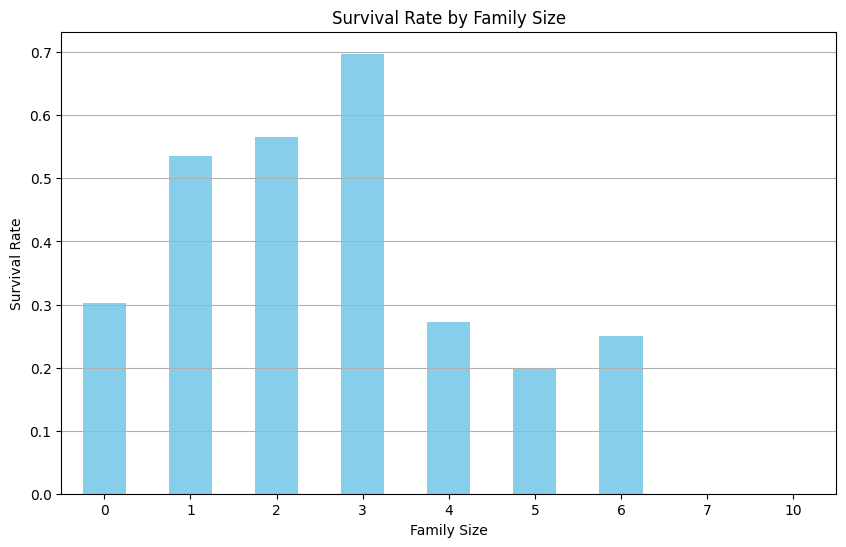

In [ ]:
import matplotlib.pyplot as plt

# 가족 크기별 생존율 계산
family_survival_rate = df1.groupby('family')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 6))
family_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

Task9_0530. 객실 등급별 평균 요금(mean_fare_by_pclass)이 생존에 미치는 영향을 분석하기 위해 mean_fare_by_pclass라는 파생 변수를 생성하여 출력하세요.

In [ ]:
df[['pclass', 'fare']].head()

In [ ]:
# 객실 등급별 평균 요금 계산하여 dict형태로 변환
mean_fare_by_pclass = df.groupby('pclass').fare.mean().to_dict()
print(mean_fare_by_pclass, '\n') # 1:평균요금, 2:평균요금, 3:평균요금
# 객실 등급별 평균 요금 파생 변수 생성
df['mean_fare_by_pclass'] = df.pclass.map(mean_fare_by_pclass) # plcass 1,2,3별 평균요금 매칭

df[['pclass','fare','mean_fare_by_pclass']].head()

corr = df[['mean_fare_by_pclass', 'survived']].corr().iloc[0,1]
corr

{1: 87.50899164086687, 2: 21.179196389891697, 3: 13.302888700564973} 



0.2918753351352463

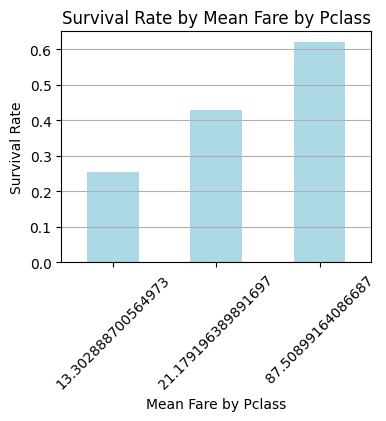

In [ ]:
#생존율과 Mean Fare by Pclass 간의 막대그래프 그리기

# 생존율 계산
survival_rate_by_fare = df.groupby('mean_fare_by_pclass')['survived'].mean()

# 그래프 그리기
plt.figure(figsize=(4, 3))
survival_rate_by_fare.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Mean Fare by Pclass')
plt.xlabel('Mean Fare by Pclass')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()